In [109]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install ta
import ta
!pip install xgboost
!pip install tensorflow
from datetime import timedelta
import matplotlib.pyplot as plt

In [272]:
Eicher_Motors = pd.read_csv("Eicher_2Years Data.csv")

In [273]:
Eicher_Motors

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,30-May-25,EQ,NaN,NaN,NaN,NaN,NaN,5333.5,NaN,NaN,NaN,NaN,NaN,NaN
1,29-May-25,EQ,NaN,NaN,NaN,NaN,NaN,5372.25,NaN,NaN,NaN,NaN,NaN,NaN
2,28-May-25,EQ,"5,405.00","5,409.50","5,314.00","5,389.50","5,327.00","5,326.50","5,356.41","5,906.50","4,253.85","3,80,066","2,03,57,88,941.00","38,173"
3,27-May-25,EQ,"5,420.00","5,445.00","5,376.00","5,427.50","5,400.00","5,389.50","5,401.15","5,906.50","4,253.85","4,52,769","2,44,54,71,132.00","37,010"
4,26-May-25,EQ,"5,403.00","5,473.00","5,400.50","5,400.00","5,430.00","5,427.50","5,440.24","5,906.50","4,253.85","3,37,099","1,83,39,00,134.50","33,503"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,02-Jun-23,EQ,"3,720.00","3,748.00","3,657.00","3,716.05","3,711.00","3,699.40","3,685.70","3,889.65","2,585.05","9,87,424","3,63,93,49,929.25","69,237"
495,01-Jun-23,EQ,"3,713.70","3,733.00","3,687.00","3,671.95","3,700.60","3,716.05","3,714.81","3,889.65","2,585.05","6,22,442","2,31,22,55,185.20","55,797"
496,31-May-23,EQ,"3,678.35","3,727.00","3,656.25","3,678.35","3,678.30","3,671.95","3,683.86","3,889.65","2,585.05","11,88,672","4,37,89,01,839.95","68,961"
497,30-May-23,EQ,"3,711.45","3,722.80","3,670.40","3,711.45","3,676.00","3,678.35","3,702.12","3,889.65","2,585.05","5,98,100","2,21,42,36,785.20","31,086"


In [274]:
print(Eicher_Motors.columns.tolist())

['Date', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ', 'No of trades ']


In [275]:
#Clean the data
Eicher_Motors.columns = Eicher_Motors.columns.str.strip().str.lower()
Eicher_Motors["close"] = Eicher_Motors["close"].astype(str).str.replace(",", "").astype(float)
Eicher_Motors["date"] = pd.to_datetime(Eicher_Motors["date"], format="%d-%b-%y")
Eicher_Motors.set_index("date", inplace=True)
Eicher_Motors.sort_index(inplace=True)

Text(0, 0.5, 'Price in Rupees')

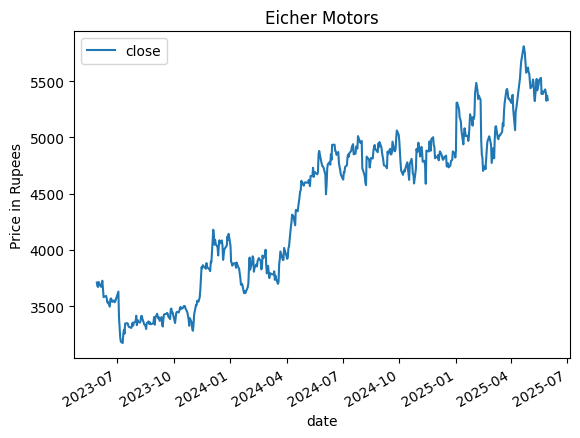

In [276]:
Eicher_Motors.plot.line(y="close",use_index=True)
plt.title("Eicher Motors")
plt.ylabel("Price in Rupees")

In [277]:
#feature Engineering
Eicher_Motors["lag1"] = Eicher_Motors["close"].shift(1)
#Eicher_Motors["lag2"] = Eicher_Motors["close"].shift(2)
#Eicher_Motors["rolling_mean7"] = Eicher_Motors["close"].rolling(window=7).mean()
Eicher_Motors["rolling_std7"] = Eicher_Motors["close"].rolling(window=7).std()
Eicher_Motors["momentum"] = Eicher_Motors["close"] - Eicher_Motors["close"].shift(1)

Eicher_Motors["rsi"] = ta.momentum.RSIIndicator(Eicher_Motors["close"]).rsi()
Eicher_Motors["macd"] = ta.trend.MACD(Eicher_Motors["close"]).macd()
Eicher_Motors["ema10"] = ta.trend.EMAIndicator(Eicher_Motors["close"], window=10).ema_indicator()
Eicher_Motors["ema_diff"] = Eicher_Motors["close"] - Eicher_Motors["ema10"]

forecast_horizon = 30
Eicher_Motors["target"] = Eicher_Motors["close"].shift(-forecast_horizon)
Eicher_Motors_cleaned = Eicher_Motors.dropna().copy()

In [278]:
print(Eicher_Motors_cleaned.index[-1])

2025-04-16 00:00:00


In [279]:
from sklearn.model_selection import train_test_split

features = ["lag1", "momentum","rolling_std7","rsi","macd","ema10","ema_diff"]
X = Eicher_Motors[features]
y = Eicher_Motors["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [280]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#model = RandomForestRegressor(n_estimators=100, random_state=42)
#model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)
#print("MAE:", mean_absolute_error(y_test, y_pred))
#print("RMSE:", mean_squared_error(y_test, y_pred))
#print("R² Score:", r2_score(y_test, y_pred))

In [281]:
def prepare_lstm_data(Eicher_Motors, features, lookback=10):
    scaler = MinMaxScaler()
    scaled_df = scaler.fit_transform(Eicher_Motors[features + ["close"]])

    X, y = [], []
    for i in range(lookback, len(scaled_df)):
        X.append(scaled_df[i-lookback:i, :-1])
        y.append(scaled_df[i, -1])
    X, y = np.array(X), np.array(y)
    print("Prepared LSTM input shape:", X.shape)
    return X, y, scaler

In [282]:
def build_and_train_lstm(X_train, y_train, X_test, y_test):
    if X_train.ndim != 3:
        raise ValueError(f"Expected 3D input for LSTM but got shape {X_train.shape}")
    model = Sequential([
        LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)
    return model

In [283]:
def evaluate_model(model, X_test, y_test, scaler, features):
    y_pred_scaled = model.predict(X_test)
    X_dummy = np.zeros((len(y_pred_scaled), len(features)))
    y_pred_full = np.hstack([X_dummy, y_pred_scaled])
    y_test_full = np.hstack([X_dummy, y_test.reshape(-1, 1)])

    y_pred_inv = scaler.inverse_transform(y_pred_full)[:, -1]
    y_test_inv = scaler.inverse_transform(y_test_full)[:, -1]

    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = mean_squared_error(y_test_inv, y_pred_inv)
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

features = ["lag1", "momentum", "rsi", "macd", "ema10", "ema_diff"]
X, y, scaler = prepare_lstm_data(Eicher_Motors_cleaned, features)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = build_and_train_lstm(X_train, y_train, X_test, y_test)

evaluate_model(model, X_test, y_test, scaler, features)


Prepared LSTM input shape: (434, 10, 6)
Epoch 1/30


/Users/danieldasilva/miniconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0789 - val_loss: 0.0253
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - val_loss: 0.0079
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - val_loss: 0.0074
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 0.0063
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - val_loss: 0.0055
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_loss: 0.0056
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 0.0061
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0042
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 0.0039
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 0.0035
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - val_loss: 0.0037

In [284]:
def forecast_june_lstm_future(model, Eicher_Motors, features, scaler, lookback=10):
    df_copy = Eicher_Motors.copy()
    forecasted_days = []

    # Start from the first weekday in June 2025
    next_date = pd.Timestamp("2025-06-01")
    while next_date.weekday() >= 5 or next_date in df_copy.index:
        next_date += timedelta(days=1)

    # Loop while still inside June 2025
    while next_date.month == 6 and next_date.year == 2025:
        # Recompute features
        df_copy["rsi"] = ta.momentum.RSIIndicator(df_copy["close"]).rsi()
        df_copy["macd"] = ta.trend.MACD(df_copy["close"]).macd()
        df_copy["ema10"] = ta.trend.EMAIndicator(df_copy["close"], window=10).ema_indicator()
        df_copy["ema_diff"] = df_copy["close"] - df_copy["ema10"]
        df_copy["lag1"] = df_copy["close"].shift(1)
        df_copy["momentum"] = df_copy["close"] - df_copy["lag1"]

        recent = df_copy[features + ["close"]].iloc[-lookback:].dropna()
        if len(recent) < lookback:
            break

        scaled = scaler.transform(recent)
        X_input = np.expand_dims(scaled[:, :-1], axis=0)

        pred_scaled = model.predict(X_input, verbose=0)[0][0]
        pred_close = scaler.inverse_transform(
            np.hstack([scaled[-1:, :-1], [[pred_scaled]]])
        )[0, -1]

        # Add only if date is a valid trading day and not already present
        if next_date.weekday() < 5 and next_date not in df_copy.index:
            new_row = pd.DataFrame(index=[next_date])
            new_row["close"] = pred_close
            new_row["lag1"] = df_copy["close"].iloc[-1]
            new_row["momentum"] = new_row["close"] - new_row["lag1"]
            new_row["ema10"] = df_copy["ema10"].iloc[-1]
            new_row["ema_diff"] = new_row["close"] - new_row["ema10"]
            new_row["rsi"] = df_copy["rsi"].iloc[-1]
            new_row["macd"] = df_copy["macd"].iloc[-1]

            df_copy = pd.concat([df_copy, new_row])
            forecasted_days.append(next_date)

        next_date += timedelta(days=1)

    return pd.Index(forecasted_days), df_copy.loc[forecasted_days]["close"].values


In [285]:
future_dates, future_prices = forecast_june_lstm_future(model, Eicher_Motors_cleaned, features, scaler)

In [286]:
future_df = pd.DataFrame({
    "date": future_dates,
    "predicted_close": future_prices
})
print(future_df)

         date  predicted_close
0  2025-06-02      5426.217823
1  2025-06-03      5304.039415
2  2025-06-04      5239.861249
3  2025-06-05      5204.828517
4  2025-06-06      5171.433587
5  2025-06-09      5133.169782
6  2025-06-10      5116.624396
7  2025-06-11      5103.869649
8  2025-06-12      5097.649813
9  2025-06-13      5100.855854
10 2025-06-16      5104.258798
11 2025-06-17      5091.298125
12 2025-06-18      5074.021739
13 2025-06-19      5057.875981
14 2025-06-20      5043.578608
15 2025-06-23      5030.028536
16 2025-06-24      5016.505387
17 2025-06-25      5004.406692
18 2025-06-26      4993.536276
19 2025-06-27      4984.090897
20 2025-06-30      4976.566960


In [287]:
def plot_predictions(Eicher_Motors, future_dates, future_prices, model_name="LSTM"):
    plt.figure(figsize=(12, 6))
    plt.plot(Eicher_Motors.index, Eicher_Motors["close"], label="Historical")

    # Stitch historical last point with predicted first point
    extended_dates = [Eicher_Motors.index[-1]] + list(future_dates)
    extended_prices = [Eicher_Motors["close"].iloc[-1]] + list(future_prices)

    plt.plot(extended_dates, extended_prices, label=f"Predicted ({model_name})", linestyle='--', color="orange")
    
    plt.title(f"{model_name} - Forecast")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.legend()
    plt.show()


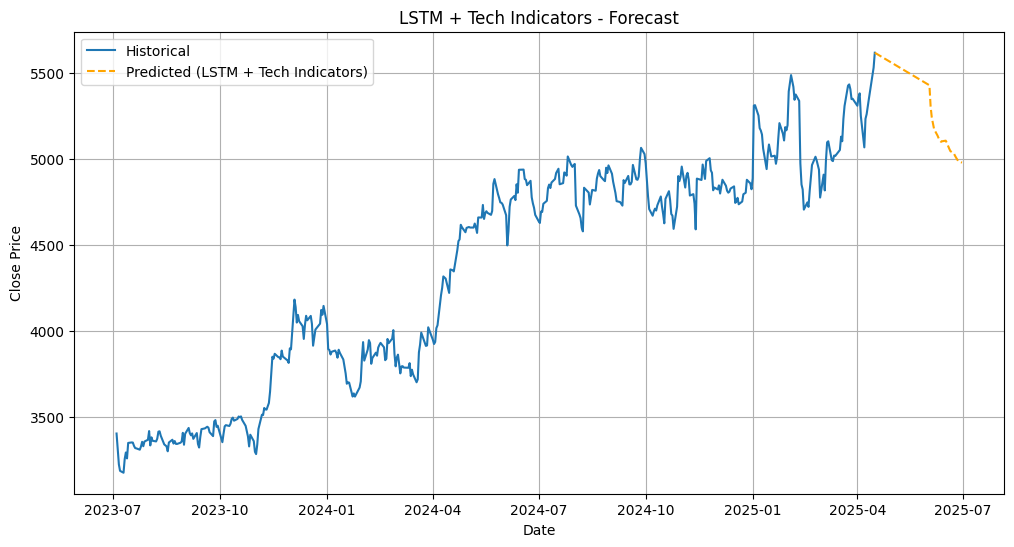

In [288]:
plot_predictions(Eicher_Motors_cleaned, future_dates, future_prices, model_name="LSTM + Tech Indicators")